In [15]:
#open financial impact analysis file titled "finanal impact analysis.xlsx"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#read in the data
data = pd.read_excel("finanal impact analysis.xlsx")

#give me the name of the column header
print(data.columns)
#Index(['Company Name', 'Company Type', 'Company in extracted data',
#       'ESG_score', 'Grade', 'Final Price (31/12/24)',
#       'Initial Price (1/1/24)', 'Stock Returns (1 Yr)',
#       '1 Yr Total Returns (%)', 'Dividend Yield', 'P/E Ratio', 'P/B Ratio',
#       'Market Capitalization ', 'Sharpe Ratio', 'Beta ', 'Trough Value',
#       'Peak Value', 'Maximum Drawdown', 'D/E Ratio',
#       'Interest Coverage Ratio', 'Altman Z-Score', 'Earnings Volatility',
#       'Cost of Capital', 'Asset Liability Ratio'],
#      dtype='object')


Index(['Company Name', 'Company Type', 'Company in extracted data',
       'ESG_score', 'Grade', 'Final Price (31/12/24)',
       'Initial Price (1/1/24)', 'Stock Returns (1 Yr)',
       '1 Yr Total Returns (%)', 'Dividend Yield', 'P/E Ratio', 'P/B Ratio',
       'Market Capitalization ', 'Sharpe Ratio', 'Beta', 'Trough Value',
       'Peak Value', 'Maximum Drawdown', 'D/E Ratio',
       'Interest Coverage Ratio', 'Altman Z-Score', 'Earnings Volatility',
       'Cost of Capital', 'Asset Liability Ratio'],
      dtype='object')


In [ ]:
#drop data where Company Type is Private
data = data[data['Company Type'] != 'Private']

#drop rows with invalid numeric values
data = data.dropna(subset=['ESG_score', '1 Yr Total Returns (%)', 'Beta'])


#ensure ESG_score and 1 Yr Total Returns (%) are numeric
data['ESG_score'] = pd.to_numeric(data['ESG_score'], errors='coerce')
data['1 Yr Total Returns (%)'] = pd.to_numeric(data['1 Yr Total Returns (%)'], errors='coerce')

#ensure Beta is numeric
data['Beta'] = pd.to_numeric(data['Beta'], errors='coerce')

In [ ]:
#i now want to create a new column of market capitalisation with categories of mid_cap, and big_cap based on the market capitalisation values
#i will use the following criteria
#mid_cap: < 10 billion
#big_cap: > 10 billion

#i will use the pandas cut function to create the new column
data['Market Cap Category'] = pd.cut(data['Market Capitalization '], bins=[0, 10e9, np.inf], labels=['mid_cap', 'big_cap'])

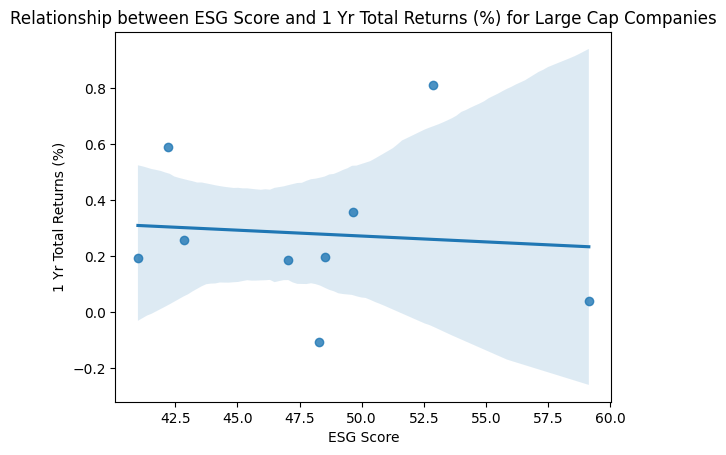

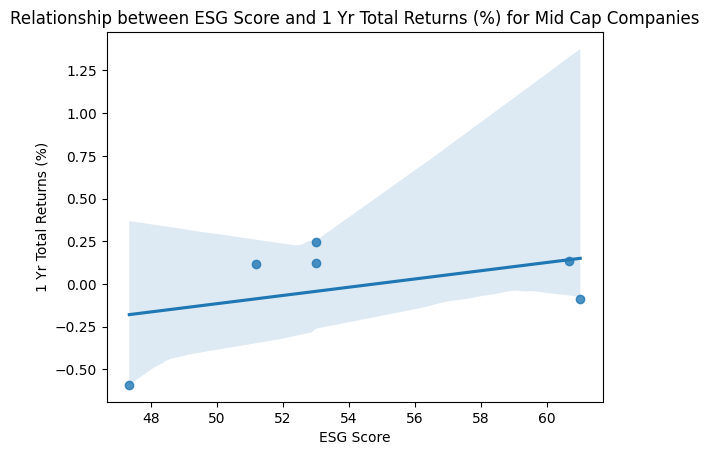

In [28]:
#draw a scatter plot between ESG_score and 1 Yr Total Returns (%), with a trend line
#run this code but split it once for big_cap and another for mid_cap
# #draw a scatter plot between ESG_score and 1 Yr Total Returns (%), with a trend line

#big_cap
data_big_cap = data[data['Market Cap Category'] == 'big_cap']
sns.regplot(x='ESG_score', y='1 Yr Total Returns (%)', data=data_big_cap)
plt.xlabel('ESG Score')
plt.ylabel('1 Yr Total Returns (%)')
plt.title('Relationship between ESG Score and 1 Yr Total Returns (%) for Large Cap Companies')
plt.show()


#mid_cap
data_mid_cap = data[data['Market Cap Category'] == 'mid_cap']
sns.regplot(x='ESG_score', y='1 Yr Total Returns (%)', data=data_mid_cap)
plt.xlabel('ESG Score')
plt.ylabel('1 Yr Total Returns (%)')
plt.title('Relationship between ESG Score and 1 Yr Total Returns (%) for Mid Cap Companies')
plt.show()


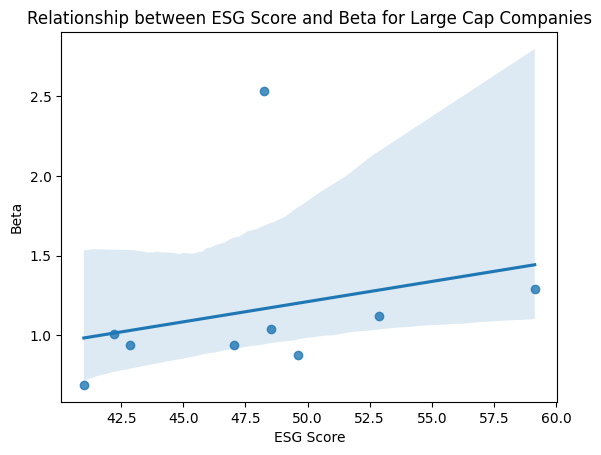

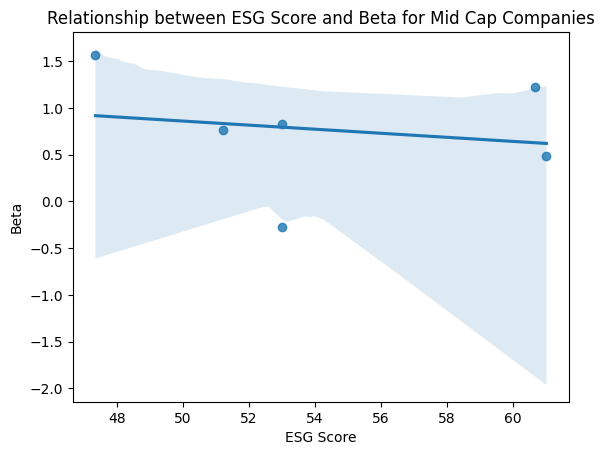

In [30]:
# now do the same for Beta
#big_cap
sns.regplot(x='ESG_score', y='Beta', data=data_big_cap)
plt.xlabel('ESG Score')
plt.ylabel('Beta')
plt.title('Relationship between ESG Score and Beta for Large Cap Companies')
plt.show()

#mid_cap
sns.regplot(x='ESG_score', y='Beta', data=data_mid_cap)
plt.xlabel('ESG Score')
plt.ylabel('Beta')
plt.title('Relationship between ESG Score and Beta for Mid Cap Companies')
plt.show()



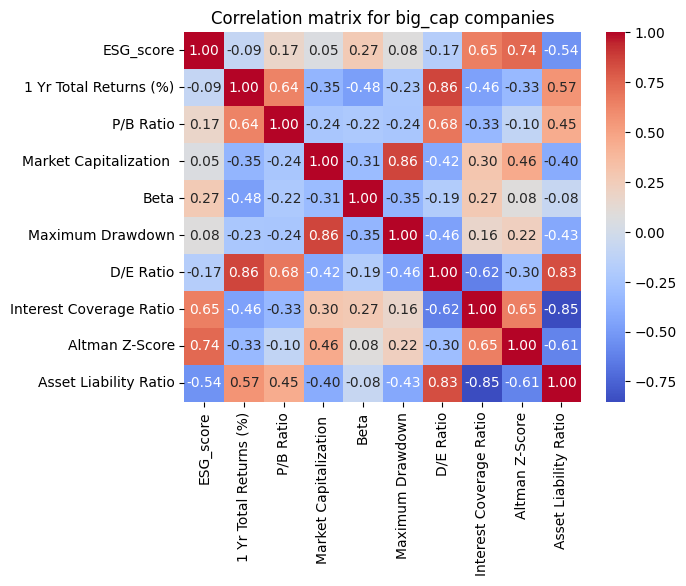

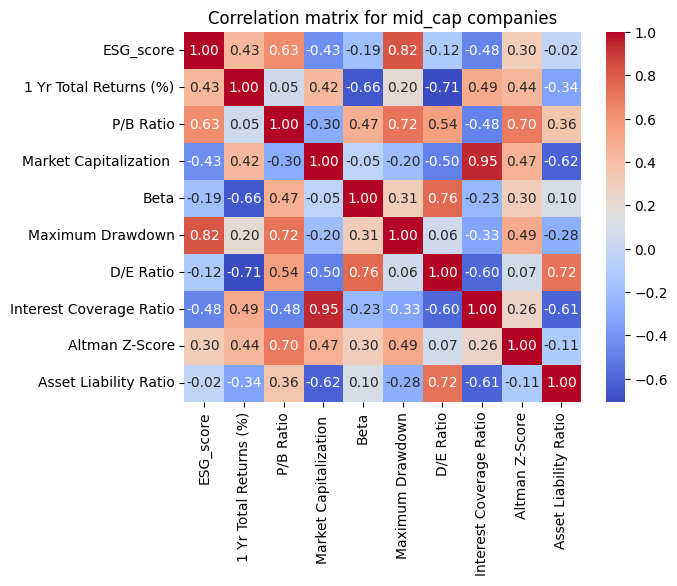

In [21]:
#do the same for big_cap and mid_cap
#big_cap
corr_big_cap = data_big_cap[['ESG_score', '1 Yr Total Returns (%)', 'P/B Ratio', 'Market Capitalization ', 'Beta', 'Maximum Drawdown', 'D/E Ratio', 'Interest Coverage Ratio', 'Altman Z-Score', 'Asset Liability Ratio']].corr()
sns.heatmap(corr_big_cap, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix for big_cap companies')
plt.show()

#mid_cap
corr_mid_cap = data_mid_cap[['ESG_score', '1 Yr Total Returns (%)', 'P/B Ratio', 'Market Capitalization ', 'Beta', 'Maximum Drawdown', 'D/E Ratio', 'Interest Coverage Ratio', 'Altman Z-Score', 'Asset Liability Ratio']].corr()
sns.heatmap(corr_mid_cap, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix for mid_cap companies')
plt.show()



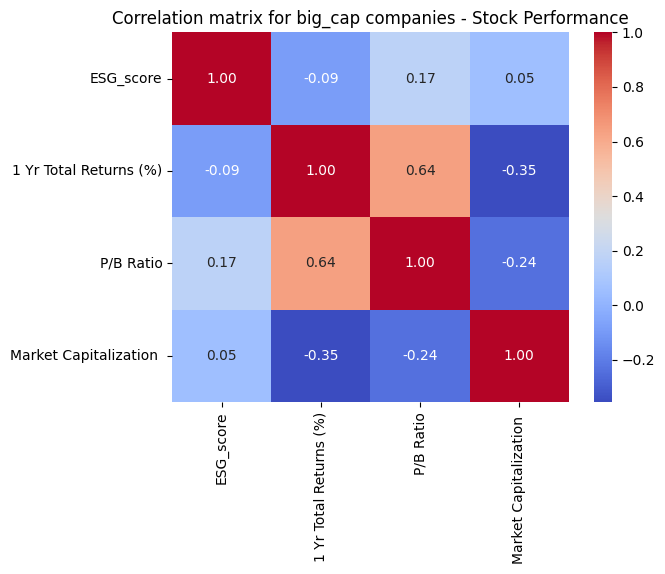

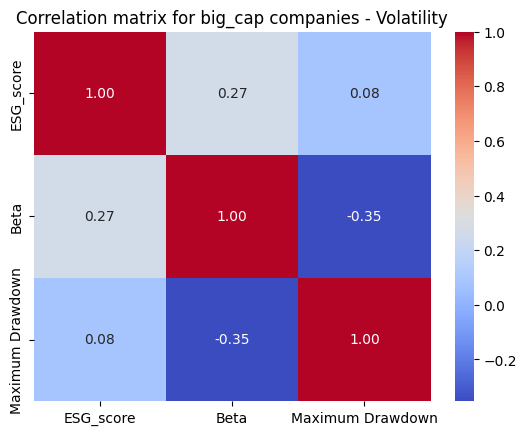

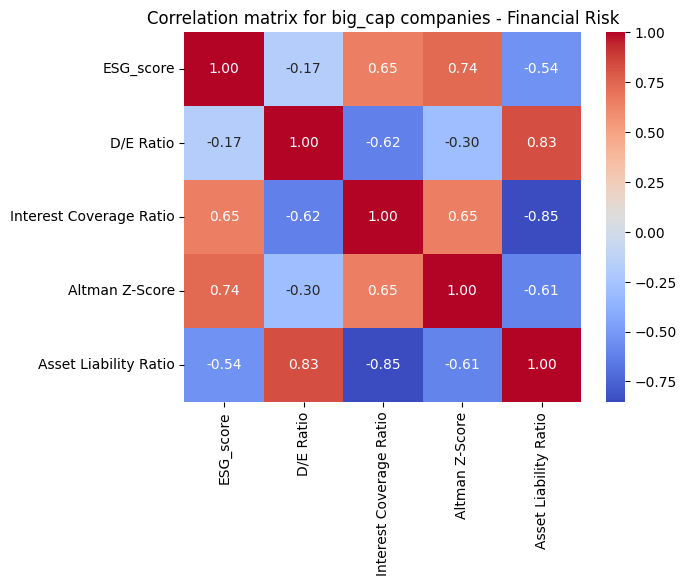

In [22]:
#now split by Stock Performance = ['1 Yr Total Returns (%)', 'P/B Ratio', 'Market Capitalization '], Volatility = ['Beta', 'Maximum Drawdown'], Financial Risk = [D/E Ratio', 'Interest Coverage Ratio', 'Altman Z-Score', 'Asset Liability Ratio']
#big_cap
corr_big_cap_stock = data_big_cap[['ESG_score', '1 Yr Total Returns (%)', 'P/B Ratio', 'Market Capitalization ']].corr()
sns.heatmap(corr_big_cap_stock, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix for big_cap companies - Stock Performance')
plt.show()

corr_big_cap_volatility = data_big_cap[['ESG_score', 'Beta', 'Maximum Drawdown']].corr()
sns.heatmap(corr_big_cap_volatility, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix for big_cap companies - Volatility')
plt.show()

corr_big_cap_financial_risk = data_big_cap[['ESG_score', 'D/E Ratio', 'Interest Coverage Ratio', 'Altman Z-Score', 'Asset Liability Ratio']].corr()
sns.heatmap(corr_big_cap_financial_risk, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix for big_cap companies - Financial Risk')
plt.show()


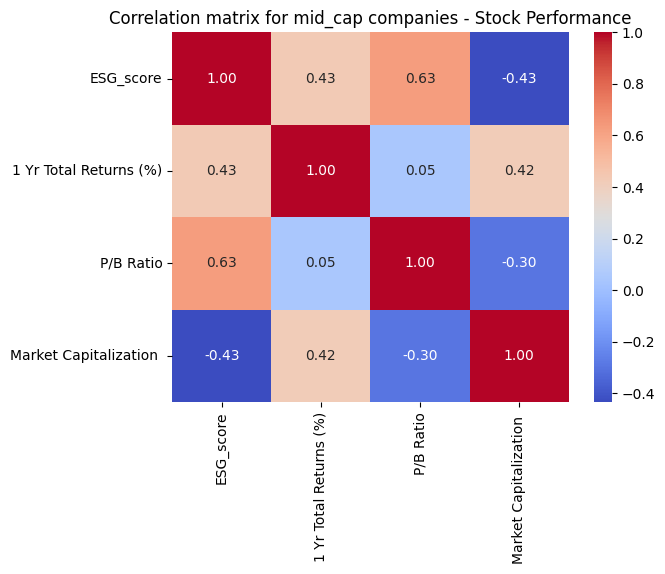

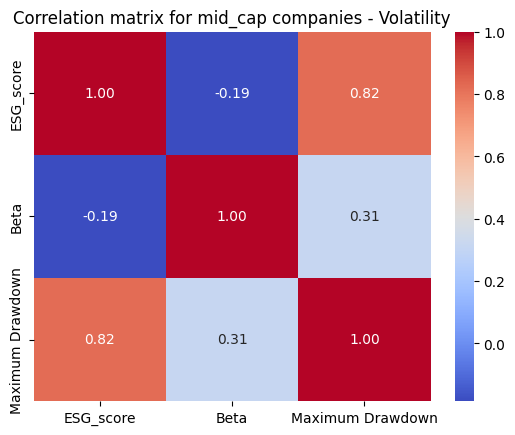

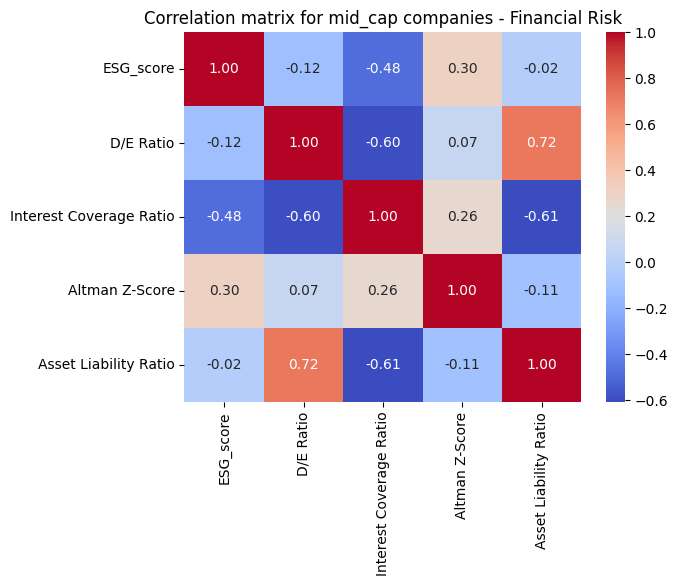

In [23]:

#mid_cap
corr_mid_cap_stock = data_mid_cap[['ESG_score', '1 Yr Total Returns (%)', 'P/B Ratio', 'Market Capitalization ']].corr()
sns.heatmap(corr_mid_cap_stock, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix for mid_cap companies - Stock Performance')
plt.show()

corr_mid_cap_volatility = data_mid_cap[['ESG_score', 'Beta', 'Maximum Drawdown']].corr()
sns.heatmap(corr_mid_cap_volatility, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix for mid_cap companies - Volatility')
plt.show()

corr_mid_cap_financial_risk = data_mid_cap[['ESG_score', 'D/E Ratio', 'Interest Coverage Ratio', 'Altman Z-Score', 'Asset Liability Ratio']].corr()
sns.heatmap(corr_mid_cap_financial_risk, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix for mid_cap companies - Financial Risk')
plt.show()